In [92]:
import optimiserBank as opt
import functionBank as func
import matplotlib.pyplot as plt
import importlib
importlib.reload(opt)
importlib.reload(func)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc 

Initial Population:


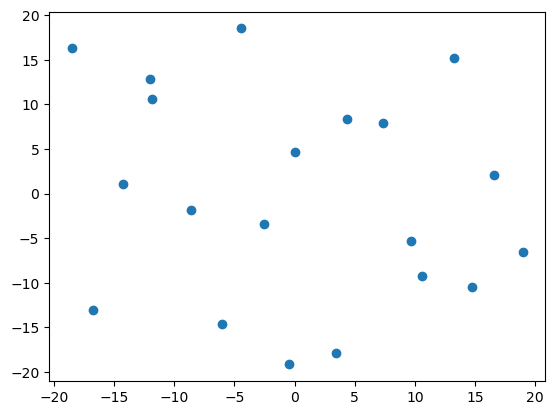

[[nan nan]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[78.89563159 17.87042082]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[ 265.9329602  -128.21692814]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[ 61.25281866 -14.47827744]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[nan nan]]
[[ 19.22764806 -12.90602679]]
[[  56.0944087   -53.55715593]
 [  12.94832235    2.52702849]
 [ 152.54579883 -126.16840377]
 [ 230.8724072  -146.58097736]
 [  42.94039147  -37.84814209]
 [  78.89563159   17.87042082]
 [ 101.70596284  -78.36638382]
 [ 151.54666955  -92.08270183]
 [ 113.80318028  -89.77626169]
 [ 225.62274567 -160.59822443]
 [ 265.9329602  -128.21692814]
 [ 214.39956044 -212.11295454]
 [ 163.90134892    3.93074295]
 [  17.86713234  -10.58535208]
 [  61.25281866  -14.47827744]
 [  75.26959987  -65.83221026]
 [  27.33522243   -2.09584308]
 [  74.26851949  -69.31952694]
 [  97.80961004   31.75152385]
 [  19.22764806  -12.90602679]]


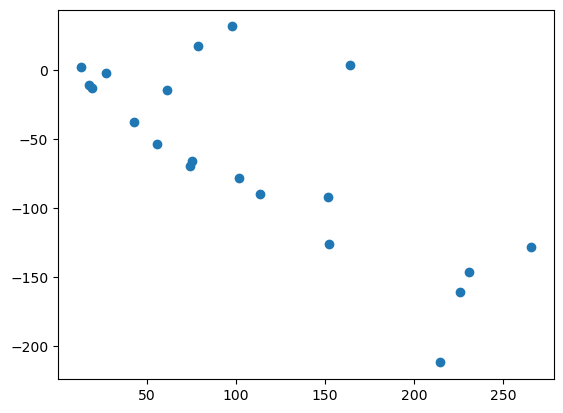

In [93]:
bounds = np.array([(-20,20), (-20,20)])
sampler = qmc.LatinHypercube(d=len(bounds))
sample = sampler.random(n=20)
initPopulation = qmc.scale(sample, bounds[:, 0], bounds[:, 1])
print('Initial Population:')
# print(initPopulation)
plt.scatter(initPopulation[:,0], initPopulation[:,1])
plt.show()

objvTargets = np.empty((0,2))

for i in range(0, 20):

    newObjvTgt = opt.MOobjective_function(initPopulation[i], func.chankongHaimes, 2)
    print(newObjvTgt)
    while np.any(np.isnan(newObjvTgt)):
        newSample = np.random.uniform(-20, high=20, size=(2,))
        newObjvTgt = opt.MOobjective_function(newSample, func.chankongHaimes, 2)

    objvTargets = np.vstack((objvTargets, newObjvTgt))

print(objvTargets)

plt.scatter(objvTargets[:,0], objvTargets[:,1])
plt.show()

In [94]:
weights = np.array((0.5, 0.5))
functionDict = {
                # func.binhAndKorn:[(0,5), (0,3)]
                # func.chankongHaimes:[(-20,20), (-20,20)]
                func.fonsecaFleming:[(-4,4), (-4,4)] 
                # func.ctp1:[(0,1), (0,1)], 
                # func.constrEx:[(0.1,1), (0,5)]
                # func.testFunction4:[(-7,4), (-7,4)]
                }

for key, value in functionDict.items():

    print(key.__name__, value)

    initSampleSize = 20
    bounds = np.array(value)
    lowBounds = bounds[:,0]
    highBounds = bounds[:,1]


    #generate one LHS for each test function, to be used for all optimisers/scalarisers
    #using a population size of 20
    sampler = qmc.LatinHypercube(d=len(bounds))
    sample = sampler.random(n=initSampleSize)
    initPopulation = qmc.scale(sample, lowBounds, highBounds)

    #check for and systematically replace nan values in initial population
    #(requires evaluating initial population)
    #TODO: this evaluation is currently repeated when initiating each SAEA.
    
    objvTargets = np.empty((0,2))

    for i in range(0, initSampleSize):

        newObjvTgt = opt.MOobjective_function(initPopulation[i], key, len(bounds))
        # print(newObjvTgt)
        while np.any(np.isnan(newObjvTgt)):
            newSample = np.random.uniform(lowBounds, high=highBounds, size=(2,))
            newObjvTgt = opt.MOobjective_function(newSample, key, len(bounds))
            initPopulation[i] = newSample

        # objvTargets = np.vstack((objvTargets, newObjvTgt))

    print('Initial Population:')
    print(initPopulation)

    LSADE = opt.LSADE(value, 20, key, func.chebyshev, 2, weights, useInitialPopulation=True, initialPopulation=initPopulation)
    LSADE.optimizerStep()

    # bayesianRun = opt.bayesianOptimiser(value, 15, key, func.HypI, 2, weights, useInitialPopulation=True, initialPopulation=initPopulation)
    # bayesianRun.runOptimiser()

fonsecaFleming [(-4, 4), (-4, 4)]
Initial Population:
[[-1.03891069  2.58225045]
 [ 0.98760116 -2.82290536]
 [ 2.20986821  3.72613562]
 [ 3.24018709 -3.73978144]
 [ 1.6220674  -0.90338664]
 [-3.07758568  2.86765298]
 [-2.27104223  0.66529999]
 [-3.91843932 -1.32469324]
 [-0.03796024  1.68680217]
 [ 1.42220192 -2.45845565]
 [ 3.93096059 -2.39157401]
 [-2.49514366  1.51166588]
 [-1.6683122   2.08220728]
 [ 0.05360014 -3.48112549]
 [-1.35701825  3.5660011 ]
 [ 3.07753464  0.0439359 ]
 [ 0.59076634  0.80083538]
 [-0.62836983 -0.41754101]
 [-3.24203563 -1.97376069]
 [ 2.59535304 -0.35551933]]
No NaN values found.


/Users/benmoore/miniconda3/envs/OpenFOAM/lib/python3.11/site-packages/gpytorch/models/exact_gp.py:284: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(


No NaN values found.
No NaN values found.
Generation 200: Best RBF Fitness = [0.48799881]
best local Solution [-0.71116753 -0.80561131]
No NaN values found.
Best found solution =  0.47574560556468054
No NaN values found.
No NaN values found.
Generation 200: Best RBF Fitness = [0.48669829]
best local Solution [-0.773524  -0.8250534]
No NaN values found.
Best found solution =  0.47574560556468054
No NaN values found.
No NaN values found.
Generation 200: Best RBF Fitness = [0.48854255]
best local Solution [-0.63580844 -0.67676542]
No NaN values found.
Best found solution =  0.47574560556468054
No NaN values found.
No NaN values found.
Generation 200: Best RBF Fitness = [0.4890129]
best local Solution [-0.24483928 -0.45582159]
No NaN values found.
Best found solution =  0.4465725560845603
No NaN values found.
No NaN values found.
Generation 200: Best RBF Fitness = [0.47868081]
best local Solution [-0.02211621  0.04438382]
No NaN values found.
Best found solution =  0.3211295229670895
No Na

KeyboardInterrupt: 